In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from pandas_datareader import data
%matplotlib inline
%precision 4

'%.4f'

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas_datareader.data as pdr
yf.pdr_override()
tickers=["FBCVX","FSMVX","FCPVX","FBGRX","FMCSX","FCPGX","FFRHX","FBNDX","FRIFX","^SPGSCI"]
findata = pdr.get_data_yahoo(tickers, start="2005-01-01", end="2021-12-31")['Adj Close']
findata.dropna()
print(findata)

[*********************100%***********************]  10 of 10 completed
                               FBCVX       FBGRX     FBNDX      FCPGX  \
Date                                                                    
2005-01-03 00:00:00-05:00   8.594170   19.220654  4.111651   4.222569   
2005-01-04 00:00:00-05:00   8.490458   18.965441  4.100730   4.154827   
2005-01-05 00:00:00-05:00   8.442062   18.891190  4.100730   4.109665   
2005-01-06 00:00:00-05:00   8.483546   18.965441  4.100730   4.124721   
2005-01-07 00:00:00-05:00   8.455893   18.970078  4.100730   4.102139   
...                              ...         ...       ...        ...   
2021-12-23 00:00:00-05:00  23.433374  183.179901  8.160027  31.590000   
2021-12-27 00:00:00-05:00  23.647646  185.747147  8.169791  31.920000   
2021-12-28 00:00:00-05:00  23.735302  184.085403  8.169791  31.690001   
2021-12-29 00:00:00-05:00  23.822956  183.896347  8.150268  31.730000   
2021-12-30 00:00:00-05:00  23.783998  183.906311  8.1

In [ ]:
data=pd.read_csv('ff.csv',index_col=0, parse_dates=True)
data

,Mkt-RF,SMB,HML,RF
Date,,,,
201201,5.05,2.03,-0.97,0.00
201202,4.42,-1.85,0.43,0.00
201203,3.11,-0.65,1.14,0.00
201204,-0.85,-0.41,-0.78,0.00
201205,-6.19,0.07,-1.06,0.01
...,...,...,...,...
202108,2.91,-0.43,-0.16,0.00
202109,-4.37,0.72,5.08,0.00
202110,6.65,-2.35,-0.48,0.00


In [ ]:
findata_ret=np.log(findata/findata.shift(1))*100
findata_ret[1:]
findata_ret=findata_ret.resample('M').last()
findata_ret

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2005-01-31 00:00:00-05:00,1.052228,0.716705,0.278158,1.398604,1.360563,0.331258,1.465055,0.085182,1.424482,1.363795
2005-02-28 00:00:00-05:00,-0.775809,-0.927062,-0.133318,-0.084848,-0.171531,0.290497,-1.329594,-0.169460,-0.680754,0.829623
2005-03-31 00:00:00-05:00,0.320550,-0.274289,0.579730,0.861344,0.438400,0.341618,0.576633,0.086172,0.428270,2.470170
2005-04-30 00:00:00-04:00,0.828481,1.075547,0.040026,0.649071,0.092031,0.241992,0.651169,0.255263,0.892192,-2.330625
2005-05-31 00:00:00-04:00,-0.479623,-0.584074,0.570389,0.000000,0.175584,0.464390,-0.086786,0.335543,0.070746,0.011274
...,...,...,...,...,...,...,...,...,...,...
2021-08-31 00:00:00-04:00,0.253601,-0.331275,-0.117880,0.076430,-0.179206,0.381685,-0.165387,0.219541,0.000000,-0.440845
2021-09-30 00:00:00-04:00,-1.270552,-0.481322,0.131032,-0.576728,-1.358643,0.253222,-1.398623,-0.371608,-1.863966,0.575429
2021-10-31 00:00:00-04:00,-0.419635,0.411448,0.131179,0.231016,-0.543464,0.368321,-0.785230,-0.218736,-0.539810,-0.168164


In [ ]:
findata_ret.describe().round(2)

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,-0.10,-0.05,0.34,0.03,-0.08,0.36,-0.04,0.04,-0.08,0.08
std,1.10,1.06,0.26,1.19,1.19,0.24,1.07,0.34,1.14,1.60
min,-3.70,-3.11,-1.25,-3.27,-3.75,-0.30,-3.39,-1.05,-3.54,-6.59
25%,-0.61,-0.59,0.19,-0.63,-0.74,0.25,-0.61,-0.10,-0.62,-0.78
50%,-0.15,-0.11,0.32,0.00,-0.05,0.34,-0.05,0.08,-0.04,-0.01
75%,0.37,0.46,0.47,0.64,0.43,0.44,0.45,0.20,0.44,0.82
max,5.90,4.33,1.62,4.90,5.54,2.56,4.20,1.38,4.53,7.18


In [ ]:
findata_ret.cumsum()

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2005-01-31 00:00:00-05:00,1.052228,0.716705,0.278158,1.398604,1.360563,0.331258,1.465055,0.085182,1.424482,1.363795
2005-02-28 00:00:00-05:00,0.276419,-0.210357,0.144841,1.313756,1.189032,0.621755,0.135461,-0.084278,0.743728,2.193418
2005-03-31 00:00:00-05:00,0.596970,-0.484646,0.724570,2.175100,1.627431,0.963373,0.712094,0.001893,1.171998,4.663588
2005-04-30 00:00:00-04:00,1.425450,0.590901,0.764596,2.824171,1.719462,1.205365,1.363263,0.257156,2.064190,2.332963
2005-05-31 00:00:00-04:00,0.945827,0.006827,1.334985,2.824171,1.895046,1.669755,1.276478,0.592699,2.134936,2.344237
...,...,...,...,...,...,...,...,...,...,...
2021-08-31 00:00:00-04:00,-15.407976,-9.041271,67.493872,8.626410,-11.069503,73.197398,-3.449473,10.125402,-10.502987,19.567712
2021-09-30 00:00:00-04:00,-16.678528,-9.522593,67.624904,8.049682,-12.428146,73.450620,-4.848097,9.753795,-12.366953,20.143141
2021-10-31 00:00:00-04:00,-17.098163,-9.111146,67.756084,8.280698,-12.971610,73.818941,-5.633327,9.535059,-12.906763,19.974977


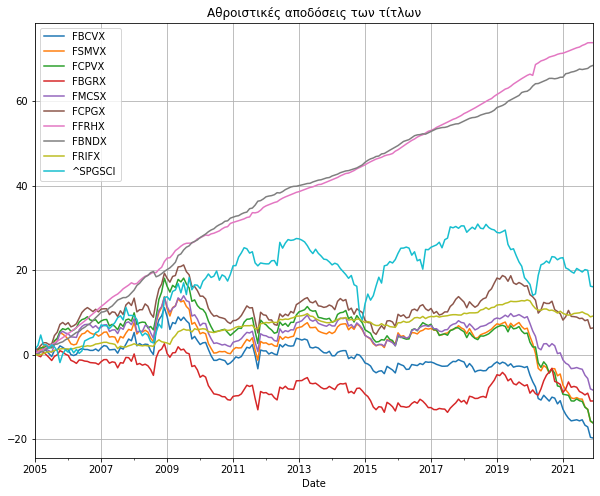

In [ ]:
findata_ret[["FBCVX","FSMVX","FCPVX","FBGRX","FMCSX","FCPGX","FFRHX","FBNDX","FRIFX","^SPGSCI"]].cumsum().plot(figsize=(10,8),grid=True,title='Αθροιστικές αποδόσεις των τίτλων')
plt.show()


In [ ]:
m=findata_ret.mean()*12
display(m)

FBCVX     -1.160401
FBGRX     -0.644579
FBNDX      4.028507
FCPGX      0.373073
FCPVX     -0.953221
FFRHX      4.344157
FMCSX     -0.494454
FRIFX      0.539180
FSMVX     -0.947059
^SPGSCI    0.944991
dtype: float64

In [ ]:
stdr=findata_ret.std()*np.sqrt(12)
display(stdr)

FBCVX      3.817844
FBGRX      3.679484
FBNDX      0.896315
FCPGX      4.122907
FCPVX      4.131629
FFRHX      0.845762
FMCSX      3.716322
FRIFX      1.166674
FSMVX      3.951998
^SPGSCI    5.536288
dtype: float64

In [ ]:
S=findata_ret.cov()
display(S)

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
FBCVX,1.214661,0.965285,-0.081807,1.122874,1.135172,0.032327,1.100815,0.243852,1.193336,0.519039
FBGRX,0.965285,1.128217,-0.071159,1.117227,0.971735,0.018839,0.947814,0.194122,0.980937,0.414411
FBNDX,-0.081807,-0.071159,0.066948,-0.061689,-0.051089,0.010553,-0.066731,-0.003154,-0.076682,-0.058679
FCPGX,1.122874,1.117227,-0.061689,1.416530,1.271894,0.040031,1.166588,0.243951,1.196133,0.451770
FCPVX,1.135172,0.971735,-0.051089,1.271894,1.422530,0.056595,1.167612,0.257496,1.236972,0.488338
FFRHX,0.032327,0.018839,0.010553,0.040031,0.056595,0.059609,0.035287,0.006831,0.026672,0.075989
FMCSX,1.100815,0.947814,-0.066731,1.166588,1.167612,0.035287,1.150921,0.245969,1.174114,0.520040
FRIFX,0.243852,0.194122,-0.003154,0.243951,0.257496,0.006831,0.245969,0.113427,0.267123,0.076987
FSMVX,1.193336,0.980937,-0.076682,1.196133,1.236972,0.026672,1.174114,0.267123,1.301524,0.491151
^SPGSCI,0.519039,0.414411,-0.058679,0.451770,0.488338,0.075989,0.520040,0.076987,0.491151,2.554207


In [ ]:
findata_ret.corr()

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
FBCVX,1.000000,0.824578,-0.286875,0.856033,0.863582,0.120140,0.931030,0.656963,0.949093,0.294676
FBGRX,0.824578,1.000000,-0.258919,0.883756,0.767045,0.072644,0.831771,0.542648,0.809503,0.244122
FBNDX,-0.286875,-0.258919,1.000000,-0.200321,-0.165548,0.167058,-0.240401,-0.036194,-0.259776,-0.141902
FCPGX,0.856033,0.883756,-0.200321,1.000000,0.895998,0.137762,0.913654,0.608597,0.880928,0.237507
FCPVX,0.863582,0.767045,-0.165548,0.895998,1.000000,0.194354,0.912526,0.641034,0.909082,0.256190
FFRHX,0.120140,0.072644,0.167058,0.137762,0.194354,1.000000,0.134722,0.083078,0.095759,0.194745
FMCSX,0.931030,0.831771,-0.240401,0.913654,0.912526,0.134722,1.000000,0.680768,0.959316,0.303309
FRIFX,0.656963,0.542648,-0.036194,0.608597,0.641034,0.083078,0.680768,1.000000,0.695227,0.143031
FSMVX,0.949093,0.809503,-0.259776,0.880928,0.909082,0.095759,0.959316,0.695227,1.000000,0.269377
^SPGSCI,0.294676,0.244122,-0.141902,0.237507,0.256190,0.194745,0.303309,0.143031,0.269377,1.000000


In [ ]:
noa=findata_ret.columns
noa=len(noa)
mport=[]
stdport=[]
for p in range(10000):
    weights=np.random.uniform(-1,1,noa)
    if np.sum(weights)<=0:
        continue
    weights /=np.sum(weights)
    varport=weights@S@weights.T
    if varport<0:
        continue
    mport.append(weights@m)
    stdport.append(np.sqrt(varport))
    
mport=np.array(mport)
stdport=np.array(stdport)


In [ ]:
import scipy.stats as scs
import scipy.optimize as sco
def fun_stdport(weights):
    varport=weights@S@weights.T
    return np.sqrt(varport)

consmin=({'type':'eq','fun':lambda x: np.sum(x)-1})
w0=noa*[1/noa,]
opts_min=sco.minimize(fun_stdport,w0,method='SLSQP',constraints=consmin,options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1600029380553609
            Iterations: 9
            Function evaluations: 104
            Gradient evaluations: 9


In [ ]:
opts_min.x

array([ 0.0056,  0.0575,  0.3451, -0.0231, -0.0706,  0.3934, -0.0263,
        0.278 ,  0.0372,  0.0032])

In [ ]:
mport_min=opts_min.x@m
display(mport_min)
stdport_min=opts_min.fun
display(stdport_min)

3.245014123553446

0.1600029380553609

In [ ]:

mport_eff=np.linspace(mport_min,0.3,500)
stdport_eff=[]
for mp in mport_eff:
    cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: x@m-mp})
    opts=sco.minimize(fun_stdport,w0,method='SLSQP',constraints=cons)
    stdport_eff.append(opts.fun)
    
stdport_eff=np.array(stdport_eff)

mport_noteff=np.linspace(-0.05,mport_min,500)
stdport_noteff=[]
for mp in mport_noteff:
    cons=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: x@m-mp})
    opts=sco.minimize(fun_stdport,w0,method='SLSQP',constraints=cons)
    stdport_noteff.append(opts.fun)
    
stdport_noteff=np.array(stdport_noteff)

Text(0.5, 1.0, 'To σύνολο των επενδυτικών δυνατοτήτων ελάχιστου κινδύνου')

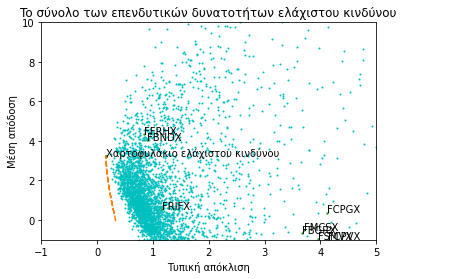

In [ ]:
stdport_full=np.concatenate((stdport_noteff,stdport_eff))
mport_full=np.concatenate((mport_noteff,mport_eff))

plt.scatter(stdport,mport,color='c',s=1)
plt.plot(stdport_full,mport_full,color='C1',linestyle='--')
plt.scatter(stdr,m,color='C2',marker='o',s=2)
plt.annotate('FBCVX', xy = (stdr[0], m[0]))
plt.annotate('FBGRX', xy = (stdr[1], m[1]))
plt.annotate('FBNDX', xy = (stdr[2], m[2]))
plt.annotate('FCPGX', xy = (stdr[3], m[3]))
plt.annotate('FCPVX ', xy = (stdr[4], m[4]))
plt.annotate('FFRHX', xy = (stdr[5], m[5]))
plt.annotate('FMCSX', xy = (stdr[6], m[6]))
plt.annotate('FRIFX', xy = (stdr[7], m[7]))
plt.annotate('FSMVX', xy = (stdr[8], m[8]))
plt.annotate('^SPGSCI', xy = (stdr[9], m[9]))
plt.scatter(stdport_min,mport_min,color='C2',marker='o',s=5)
plt.annotate('Χαρτοφυλάκιο ελάχιστου κινδύνου', xy = (stdport_min, mport_min))
plt.xlim([-1.0,5.0])
plt.ylim([-1.0,10.0])
plt.xlabel('Τυπική απόκλιση')
plt.ylabel('Μέση απόδοση')
plt.title('To σύνολο των επενδυτικών δυνατοτήτων ελάχιστου κινδύνου')

Text(0.5, 1.0, 'Το αποτελεσματικό σύνορο')

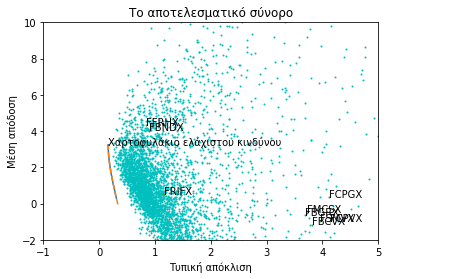

In [ ]:
plt.scatter(stdport,mport,color='c',s=1)
plt.plot(stdport_eff,mport_eff,color='C0')
plt.plot(stdport_noteff,mport_noteff,color='C1',linestyle='--')
plt.scatter(stdr,m,color='C2',marker='o',s=1)
plt.annotate('FBCVX', xy = (stdr[0], m[0]))
plt.annotate('FBGRX', xy = (stdr[1], m[1]))
plt.annotate('FBNDX', xy = (stdr[2], m[2]))
plt.annotate('FCPGX', xy = (stdr[3], m[3]))
plt.annotate('FCPVX ', xy = (stdr[4], m[4]))
plt.annotate('FFRHX', xy = (stdr[5], m[5]))
plt.annotate('FMCSX', xy = (stdr[6], m[6]))
plt.annotate('FRIFX', xy = (stdr[7], m[7]))
plt.annotate('FSMVX', xy = (stdr[8], m[8]))
plt.annotate('^SPGSCI', xy = (stdr[9], m[9]))
plt.scatter(stdport_min,mport_min,color='C2',marker='o',s=1)
plt.annotate('Χαρτοφυλάκιο ελάχιστου κινδύνου', xy = (stdport_min, mport_min))
plt.xlim([-1.0,5.0])
plt.ylim([-2.0,10.0])
plt.xlabel('Τυπική απόκλιση')
plt.ylabel('Μέση απόδοση')
plt.title('Το αποτελεσματικό σύνορο')

In [ ]:

rf=data['RF'].mean()
def fun_Sharpe(weights):
    mport=weights@m
    varport=weights@S@weights.T
    sdport=np.sqrt(varport)
    return -(mport-rf)/sdport

In [ ]:
cons=({'type':'eq','fun':lambda x: np.sum(x)-1})
w0=noa*[1/noa,]
opts_maxsharpe=sco.minimize(fun_Sharpe,w0,method='SLSQP',constraints=cons,options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -22.93345847633055
            Iterations: 32
            Function evaluations: 389
            Gradient evaluations: 32


In [ ]:
opts_maxsharpe.x

array([-2.6196e-02,  1.2914e-02,  4.3039e-01,  4.7590e-02, -1.3558e-01,
        5.6760e-01, -1.7654e-02,  4.1882e-04,  1.2429e-01, -3.7670e-03])

In [ ]:

mport_tangent=opts_maxsharpe.x@m
display(mport_tangent)
stdport_tangent=fun_stdport(opts_maxsharpe.x)
display(stdport_tangent)

4.256315380013373

0.18360286642734175

Text(0.5, 1.0, 'Το αποτελεσματικό σύνορο και η γραμμή κατανομής του κεφαλαίου')

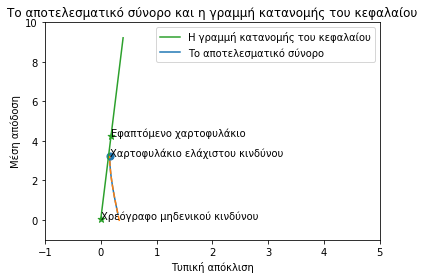

In [ ]:

sc=np.arange(0,0.41,0.01)
Sharpe=(mport_tangent-rf)/stdport_tangent
mc=rf+Sharpe*sc
plt.plot(sc,mc,color='C2',label='Η γραμμή κατανομής του κεφαλαίου')
plt.plot(stdport_eff,mport_eff,color='C0',label='Το αποτελεσματικό σύνορο')
plt.plot(stdport_noteff,mport_noteff,color='C1',linestyle='--')
plt.scatter(stdport_min,mport_min,color='C0',marker='o',s=50)
plt.scatter((0,stdport_tangent),(rf,mport_tangent),color='C2',marker='*',s=50)
plt.annotate('Χαρτοφυλάκιο ελάχιστου κινδύνου', xy = (stdport_min+0.001, mport_min))
plt.annotate('Εφαπτόμενο χαρτοφυλάκιο', xy = (stdport_tangent+0.001, mport_tangent))
plt.annotate('Χρεόγραφο μηδενικού κινδύνου', xy = (0.001, rf))
plt.xlim(-1.0,5.0)
plt.ylim(-1.0,10.0)
plt.legend()
plt.xlabel('Τυπική απόκλιση')
plt.ylabel('Μέση απόδοση')
plt.title('Το αποτελεσματικό σύνορο και η γραμμή κατανομής του κεφαλαίου')

In [ ]:
x = len(data)
data =  data.reset_index()
findata_ret=  findata_ret.reset_index()


In [ ]:
data.head()

,Date,Mkt-RF,SMB,HML,RF
0,201201,5.05,2.03,-0.97,0.00
1,201202,4.42,-1.85,0.43,0.00
2,201203,3.11,-0.65,1.14,0.00
3,201204,-0.85,-0.41,-0.78,0.00
4,201205,-6.19,0.07,-1.06,0.01


In [ ]:
data['Date']=findata_ret['Date']

In [ ]:
data

,Date,Mkt-RF,SMB,HML,RF
0,2005-01-31 00:00:00-05:00,5.05,2.03,-0.97,0.00
1,2005-02-28 00:00:00-05:00,4.42,-1.85,0.43,0.00
2,2005-03-31 00:00:00-05:00,3.11,-0.65,1.14,0.00
3,2005-04-30 00:00:00-04:00,-0.85,-0.41,-0.78,0.00
4,2005-05-31 00:00:00-04:00,-6.19,0.07,-1.06,0.01
...,...,...,...,...,...
115,2014-08-31 00:00:00-04:00,2.91,-0.43,-0.16,0.00
116,2014-09-30 00:00:00-04:00,-4.37,0.72,5.08,0.00
117,2014-10-31 00:00:00-04:00,6.65,-2.35,-0.48,0.00
118,2014-11-30 00:00:00-05:00,-1.55,-1.32,-0.44,0.00


In [ ]:
data = data.set_index('Date')

In [ ]:
findata_ret = findata_ret.set_index('Date')

In [ ]:
findata_ret

,FBCVX,FBGRX,FBNDX,FCPGX,FCPVX,FFRHX,FMCSX,FRIFX,FSMVX,^SPGSCI
Date,,,,,,,,,,
2005-01-31 00:00:00-05:00,1.052228,0.716705,0.278158,1.398604,1.360563,0.331258,1.465055,0.085182,1.424482,1.363795
2005-02-28 00:00:00-05:00,-0.775809,-0.927062,-0.133318,-0.084848,-0.171531,0.290497,-1.329594,-0.169460,-0.680754,0.829623
2005-03-31 00:00:00-05:00,0.320550,-0.274289,0.579730,0.861344,0.438400,0.341618,0.576633,0.086172,0.428270,2.470170
2005-04-30 00:00:00-04:00,0.828481,1.075547,0.040026,0.649071,0.092031,0.241992,0.651169,0.255263,0.892192,-2.330625
2005-05-31 00:00:00-04:00,-0.479623,-0.584074,0.570389,0.000000,0.175584,0.464390,-0.086786,0.335543,0.070746,0.011274
...,...,...,...,...,...,...,...,...,...,...
2021-08-31 00:00:00-04:00,0.253601,-0.331275,-0.117880,0.076430,-0.179206,0.381685,-0.165387,0.219541,0.000000,-0.440845
2021-09-30 00:00:00-04:00,-1.270552,-0.481322,0.131032,-0.576728,-1.358643,0.253222,-1.398623,-0.371608,-1.863966,0.575429
2021-10-31 00:00:00-04:00,-0.419635,0.411448,0.131179,0.231016,-0.543464,0.368321,-0.785230,-0.218736,-0.539810,-0.168164


In [ ]:
opts_maxsharpe.x

array([-2.6196e-02,  1.2914e-02,  4.3039e-01,  4.7590e-02, -1.3558e-01,
        5.6760e-01, -1.7654e-02,  4.1882e-04,  1.2429e-01, -3.7670e-03])

In [ ]:
portfolio=0.4*data['RF']+(0.6*((-0.0267)*findata_ret['FBCVX']+0.0122*findata_ret['FSMVX']+0.4317*findata_ret['FCPVX']+0.0487*findata_ret['FBGRX']+(-0.1366)*findata_ret['FMCSX']+0.5704*findata_ret['FCPGX']+(-0.0175)*findata_ret['FFRHX']+(-0.004)*findata_ret['FBNDX']+0.1256*findata_ret['FRIFX']+(-0.0039)*findata_ret['^SPGSCI']))
portfolio_ret=np.log(portfolio/portfolio.shift(1))
portfolio_excess_ret=portfolio_ret-data['RF']



/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
portfolio_ret.dropna(inplace=True)
portfolio_ret.tail(10)

Date
2013-02-28 00:00:00-05:00   -0.394440
2013-03-31 00:00:00-04:00    0.015970
2013-04-30 00:00:00-04:00    0.073029
2013-06-30 00:00:00-04:00   -1.492469
2013-09-30 00:00:00-04:00   -2.464522
2013-10-31 00:00:00-04:00    0.728438
2013-12-31 00:00:00-05:00    1.698317
2014-02-28 00:00:00-05:00   -0.417789
2014-04-30 00:00:00-04:00   -1.248299
2014-12-31 00:00:00-05:00    0.077590
dtype: float64

In [ ]:
portfolio_excess_ret.dropna(inplace=True)
portfolio_excess_ret.tail(10)

Date
2013-02-28 00:00:00-05:00   -0.514440
2013-03-31 00:00:00-04:00   -0.114030
2013-04-30 00:00:00-04:00    0.073029
2013-06-30 00:00:00-04:00   -1.502469
2013-09-30 00:00:00-04:00   -2.474522
2013-10-31 00:00:00-04:00    0.718438
2013-12-31 00:00:00-05:00    1.688317
2014-02-28 00:00:00-05:00   -0.417789
2014-04-30 00:00:00-04:00   -1.248299
2014-12-31 00:00:00-05:00    0.067590
dtype: float64

In [ ]:
opts_min.x

array([ 0.0056,  0.0575,  0.3451, -0.0231, -0.0706,  0.3934, -0.0263,
        0.278 ,  0.0372,  0.0032])

In [ ]:
portfolio_min=(0.0056*findata_ret['FBCVX']+0.0575*findata_ret['FSMVX']+0.3451*findata_ret['FCPVX']+(-0.0231)*findata_ret['FBGRX']+(-0.0706)*findata_ret['FMCSX']+0.3934*findata_ret['FCPGX']+(-0.0263)*findata_ret['FFRHX']+0.278*findata_ret['FBNDX']+0.0372*findata_ret['FRIFX']+0.0032*findata_ret['^SPGSCI'])
portfolio_min_ret=np.log(portfolio_min/portfolio_min.shift(1))
portfolio_min_ret.dropna(inplace=True)
portfolio_min_ret.tail(10)

Date
2020-11-30 00:00:00-05:00    0.113896
2020-12-31 00:00:00-05:00   -1.969708
2021-01-31 00:00:00-05:00    2.032562
2021-03-31 00:00:00-04:00    0.100605
2021-05-31 00:00:00-04:00   -3.986175
2021-08-31 00:00:00-04:00   -1.270648
2021-09-30 00:00:00-04:00    2.673765
2021-10-31 00:00:00-04:00   -2.335687
2021-11-30 00:00:00-05:00    3.186972
2021-12-31 00:00:00-05:00   -3.214851
dtype: float64

In [ ]:
portfolio_min_excess_ret=portfolio_min_ret-data['RF']
portfolio_min_excess_ret.dropna(inplace=True)
portfolio_min_excess_ret.tail(10)

Date
2013-02-28 00:00:00-05:00   -0.583617
2013-03-31 00:00:00-04:00   -0.055165
2013-04-30 00:00:00-04:00    0.239415
2013-06-30 00:00:00-04:00   -2.224616
2013-09-30 00:00:00-04:00   -2.826051
2013-10-31 00:00:00-04:00    0.736598
2013-12-31 00:00:00-05:00    1.144805
2014-02-28 00:00:00-05:00   -0.946890
2014-04-30 00:00:00-04:00   -1.066006
2014-12-31 00:00:00-05:00   -0.075415
dtype: float64

In [ ]:
ff_ret=np.log(data['Mkt-RF']/data['Mkt-RF'].shift(1))
ff_ret.dropna(inplace=True)
ff_ret

Date
2005-02-28 00:00:00-05:00   -0.133249
2005-03-31 00:00:00-05:00   -0.351517
2005-05-31 00:00:00-04:00    1.985454
2005-07-31 00:00:00-04:00   -1.594131
2005-08-31 00:00:00-04:00    1.171816
                               ...   
2014-04-30 00:00:00-04:00    0.470409
2014-05-31 00:00:00-04:00   -2.833213
2014-06-30 00:00:00-04:00    2.249475
2014-07-31 00:00:00-04:00   -0.772584
2014-08-31 00:00:00-04:00    0.829136
Name: Mkt-RF, Length: 69, dtype: float64

In [ ]:
result = pd.concat([portfolio_excess_ret,portfolio_min_excess_ret,ff_ret], axis=1)
result.dropna(inplace=True)
result

,0,1,Mkt-RF
Date,,,
2005-05-31 00:00:00-04:00,-1.287064,-0.158723,1.985454
2005-08-31 00:00:00-04:00,3.211168,3.081643,1.171816
2005-09-30 00:00:00-04:00,-1.008890,-1.131141,0.068208
2006-04-30 00:00:00-04:00,0.618293,0.519236,-0.955511
2006-05-31 00:00:00-04:00,0.768809,0.586822,0.591364
2006-10-31 00:00:00-05:00,-0.879135,-2.386829,0.103236
2007-03-31 00:00:00-04:00,-2.009447,-0.485817,-2.380837
2007-11-30 00:00:00-05:00,-1.388255,-1.042844,0.011834
2008-05-31 00:00:00-04:00,2.759781,0.931482,0.835117


In [ ]:
result.describe().round(2)

,0,1,Mkt-RF
count,30.00,30.00,30.00
mean,-0.14,-0.08,-0.12
std,1.56,1.23,1.63
min,-3.98,-2.39,-4.41
25%,-0.98,-0.72,-0.94
50%,-0.41,-0.33,-0.07
75%,0.76,0.70,0.57
max,3.21,3.08,4.30


In [ ]:
result.cumsum()

,0,1,Mkt-RF
Date,,,
2005-05-31 00:00:00-04:00,-1.287064,-0.158723,1.985454
2005-08-31 00:00:00-04:00,1.924104,2.922920,3.157270
2005-09-30 00:00:00-04:00,0.915215,1.791779,3.225478
2006-04-30 00:00:00-04:00,1.533508,2.311015,2.269967
2006-05-31 00:00:00-04:00,2.302317,2.897837,2.861331
2006-10-31 00:00:00-05:00,1.423182,0.511008,2.964567
2007-03-31 00:00:00-04:00,-0.586266,0.025191,0.583730
2007-11-30 00:00:00-05:00,-1.974521,-1.017653,0.595564
2008-05-31 00:00:00-04:00,0.785260,-0.086171,1.430682


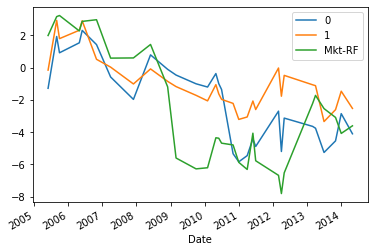

In [ ]:
result.cumsum().plot()

In [ ]:
merge_data=pd.merge(result,data,on='Date')
merge_data


,0,1,Mkt-RF_x,Mkt-RF_y,SMB,HML,RF
Date,,,,,,,
2005-05-31 00:00:00-04:00,-1.287064,-0.158723,1.985454,-6.19,0.07,-1.06,0.01
2005-08-31 00:00:00-04:00,3.211168,3.081643,1.171816,2.55,0.48,1.30,0.01
2005-09-30 00:00:00-04:00,-1.008890,-1.131141,0.068208,2.73,0.51,1.60,0.01
2006-04-30 00:00:00-04:00,0.618293,0.519236,-0.955511,1.55,-2.36,0.45,0.00
2006-05-31 00:00:00-04:00,0.768809,0.586822,0.591364,2.80,1.73,2.63,0.00
2006-10-31 00:00:00-05:00,-0.879135,-2.386829,0.103236,4.18,-1.56,1.25,0.00
2007-03-31 00:00:00-04:00,-2.009447,-0.485817,-2.380837,0.43,-1.85,4.93,0.00
2007-11-30 00:00:00-05:00,-1.388255,-1.042844,0.011834,2.55,-2.06,-3.09,0.00
2008-05-31 00:00:00-04:00,2.759781,0.931482,0.835117,1.36,0.92,-1.14,0.00


In [ ]:

Y=result[0]
X=result['Mkt-RF']
Xc=sm.add_constant(X)
model_portfolio_index=sm.OLS(Y,Xc)
modelfit_portfolio_index=model_portfolio_index.fit()
modelfit_portfolio_index.summary()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.610
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.215
Time:                        19:45:44   Log-Likelihood:                -54.560
No. Observations:                  30   AIC:                             113.1
Df Residuals:                      28   BIC:                             115.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1100      0.283     -0.389      0.700      -0.689       0.469
Mkt-RF         0.2234      0.176      1.269      0.215      -0.137       0.584
==============================================================================
Omnibus:                        0.568   Durbin-Watson:                   2.597
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.044
Skew:                          -0.015   Prob(JB):                        0.978
Kurtosis:                       3.185   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

Y=result[1] 
X=result['Mkt-RF']
Xc=sm.add_constant(X)
model_portfolio_min_index=sm.OLS(Y,Xc)
modelfit_portfolio_min_index=model_portfolio_min_index.fit()
modelfit_portfolio_min_index.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.468
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.236
Time:                        19:45:44   Log-Likelihood:                -47.416
No. Observations:                  30   AIC:                             98.83
Df Residuals:                      28   BIC:                             101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0642      0.223     -0.288      0.775      -0.521       0.392
Mkt-RF         0.1681      0.139      1.212      0.236      -0.116       0.452
==============================================================================
Omnibus:                        2.808   Durbin-Watson:                   2.807
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.531
Skew:                           0.487   Prob(JB):                        0.465
Kurtosis:                       3.526   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2005-05-31 00:00:00-04:00 to 2014-04-30 00:00:00-04:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
 1   1       30 non-null     float64
 2   Mkt-RF  30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [ ]:
result.reset_index(drop = True)

,0,1,Mkt-RF
0,-1.287064,-0.158723,1.985454
1,3.211168,3.081643,1.171816
2,-1.008890,-1.131141,0.068208
3,0.618293,0.519236,-0.955511
4,0.768809,0.586822,0.591364
5,-0.879135,-2.386829,0.103236
6,-2.009447,-0.485817,-2.380837
7,-1.388255,-1.042844,0.011834
8,2.759781,0.931482,0.835117
9,-0.896193,-0.771627,-2.627511


In [ ]:
X=data[['Mkt-RF','SMB','HML']]

In [ ]:
X.reset_index(drop = True)

,Mkt-RF,SMB,HML
0,5.05,2.03,-0.97
1,4.42,-1.85,0.43
2,3.11,-0.65,1.14
3,-0.85,-0.41,-0.78
4,-6.19,0.07,-1.06
...,...,...,...
115,2.91,-0.43,-0.16
116,-4.37,0.72,5.08
117,6.65,-2.35,-0.48
118,-1.55,-1.32,-0.44


In [ ]:
Xc=sm.add_constant(X)
model_portfolio_FF=sm.OLS(result[0],Xc)
modelfit_portfolio_FF=model_portfolio_FF.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [ ]:

X=data[['Mkt-RF','SMB','HML']]
X.reset_index(drop = True)
Xc=sm.add_constant(X)
model_portfolio_FF=sm.OLS(result[0],Xc)
modelfit_portfolio_FF=model_portfolio_FF.fit()
modelfit_portfolio_FF.summary()
##doesnt work#########################


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [ ]:
X=data[['Mkt-RF','SMB','HML']]
Xc=sm.add_constant(X)
model_portfolio_min_FF=sm.OLS(result[1],Xc)
modelfit_portfolio_min_FF=model_portfolio_min_FF.fit()
modelfit_portfolio_min_FF.summary()
##doesnt work#########################

In [ ]:
modelfit_portfolio_FF.resid.std() 

In [ ]:
modelfit_portfolio_min_FF.resid.std() 

In [ ]:
Sharpe_market=result['Mkt-RF'].mean()/result['Mkt-RF'].std()
Sharpe_portfolio=result[0].mean()/result[0].std()
Sharpe_portfolio_min=result[1].mean()/result[1].std()
Sharpe_market,Sharpe_portfolio,Sharpe_portfolio_min

In [ ]:
Msq_portfolio=result['Mkt-RF'].std()*(Sharpe_portfolio-Sharpe_market)
Msq_portfolio_min=result['Mkt-RF'].std()*(Sharpe_portfolio_min-Sharpe_market)
Msq_portfolio,Msq_portfolio_min

In [ ]:
alpha_portfolio=modelfit_portfolio_index.params['const']
unsyst_risk_portfolio=modelfit_portfolio_index.resid.std()
Inf_portfolio=alpha_portfolio/unsyst_risk_portfolio
alpha_portfolio_min=modelfit_portfolio_min_index.params['const']
unsyst_risk_portfolio_min=modelfit_portfolio_min_index.resid.std()
Inf_portfolio_min=alpha_portfolio_min/unsyst_risk_portfolio_min
Inf_portfolio,Inf_portfolio_min

In [ ]:
beta_portfolio=modelfit_portfolio_index.params['Mkt-RF']
beta_portfolio_min=modelfit_portfolio_min_index.params['Mkt-RF']
Treynor_market=result['Mkt-RF'].mean()/1
Treynor_portfolio=result[0].mean()/beta_portfolio
Treynor_portfolio_min=result[1].mean()/beta_portfolio_min
Treynor_market,Treynor_portfolio,Treynor_portfolio_min